<a href="https://colab.research.google.com/github/ritikchawla/QuantumComputing-practice-/blob/master/quantom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qiskit

     |████████████████████████████████| 6.7MB 7.5MB/s 
     |████████████████████████████████| 23.4MB 116kB/s 
     |████████████████████████████████| 163kB 51.0MB/s 
     |████████████████████████████████| 174kB 59.3MB/s 
     |████████████████████████████████| 1.9MB 56.0MB/s 
     |████████████████████████████████| 5.8MB 54.7MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 768kB 49.1MB/s 
     |████████████████████████████████| 296kB 54.3MB/s 
     |████████████████████████████████| 71kB 10.6MB/s 
     |████████████████████████████████| 26.0MB 118kB/s 
     |████████████████████████████████| 573kB 50.1MB/s 
     |████████████████████████████████| 2.7MB 45.4MB/s 
  Created wheel for qiskit: filename=qiskit-0.19.2-cp36-none-any.whl size=2896 sha256=83809e7444ee4dc36d282ff2d17527f48eef0c2ee1e009c1b8e2a92dc99a8b54
  Stored in directory: /root/.cache/pip/wheels/d8/29/6e/e065f721b42fe70

In [0]:
import qiskit

In [3]:
qiskit.__qiskit_version__

{'qiskit': None,
 'qiskit-aer': '0.5.1',
 'qiskit-aqua': '0.7.1',
 'qiskit-ibmq-provider': '0.7.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-terra': '0.14.1'}

In [0]:
from qiskit import *

Add your IBMQ account

In [0]:
from qiskit import IBMQ
IBMQ.save_account('')

In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [0]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

In [0]:
%matplotlib inline

In [25]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

In [26]:
circuit.h(qr[0])

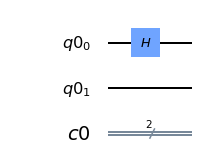

In [27]:
circuit.draw(output='mpl')

In [29]:
circuit.cx(qr[0],qr[1])

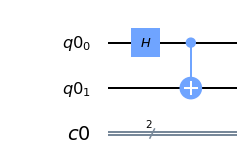

In [30]:
circuit.draw(output='mpl')

In [31]:
circuit.measure(qr,cr)

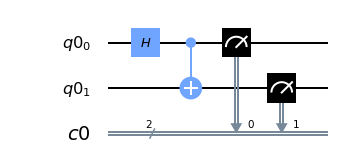

In [32]:
circuit.draw(output='mpl')

In [0]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator).result()

In [0]:
from qiskit.tools.visualization import plot_histogram

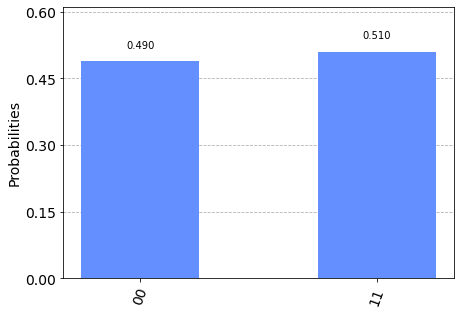

In [35]:
plot_histogram(result.get_counts(circuit))

In [0]:
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_16_melbourne')
job=execute(circuit,backend=qcomp)

In [0]:
from qiskit.tools.monitor import job_monitor

In [38]:
job_monitor(job)

Job Status: job has successfully run


In [0]:
result=job.result()

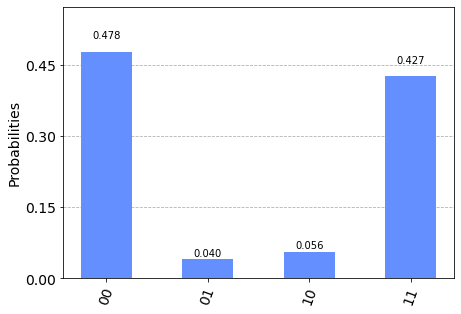

In [40]:
plot_histogram(result.get_counts(circuit))

In [0]:
from qiskit.tools.visualization import plot_bloch_multivector

In [42]:
circuit=QuantumCircuit(1,1)
circuit.x(0)
simulator=Aer.get_backend('statevector_simulator')
result=execute(circuit,backend=simulator).result()
statevector=result.get_statevector()
print(statevector)

[0.+0.j 1.+0.j]


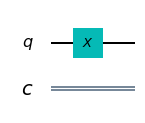

In [43]:
%matplotlib inline
circuit.draw(output='mpl')

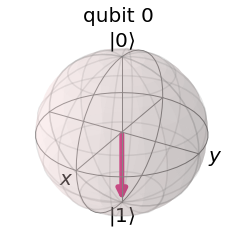

In [44]:
plot_bloch_multivector(statevector)

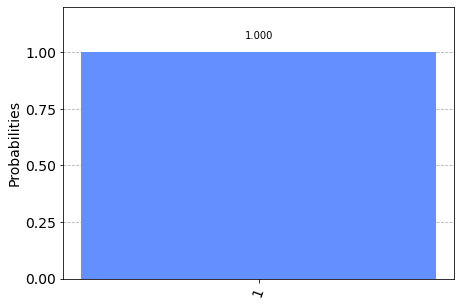

In [45]:
circuit.measure([0],[0])
backend=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=backend,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


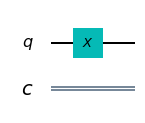

In [46]:
circuit=QuantumCircuit(1,1)
circuit.x(0)
simulator=Aer.get_backend('unitary_simulator')
result=execute(circuit,backend=simulator).result()
unitary=result.get_unitary()
print(unitary)
%matplotlib inline
circuit.draw(output='mpl')

# **Quantom Teleportation**

In [0]:
from qiskit import *

In [0]:
circuit=QuantumCircuit(3,3)

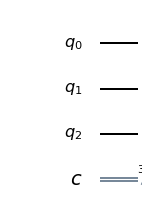

In [48]:
%matplotlib inline
circuit.draw(output='mpl')

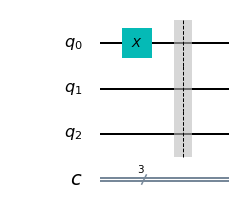

In [49]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

In [50]:
circuit.h(1)
circuit.cx(1,2)

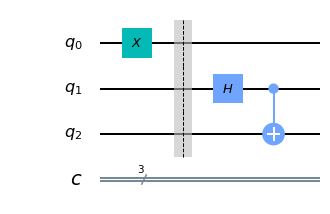

In [51]:
circuit.draw(output='mpl')

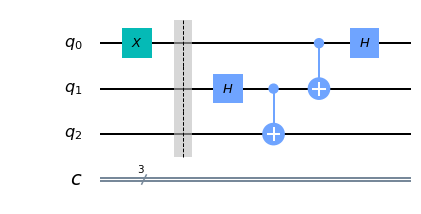

In [52]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

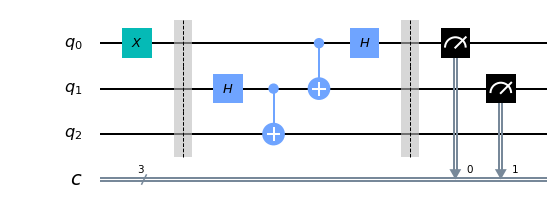

In [53]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

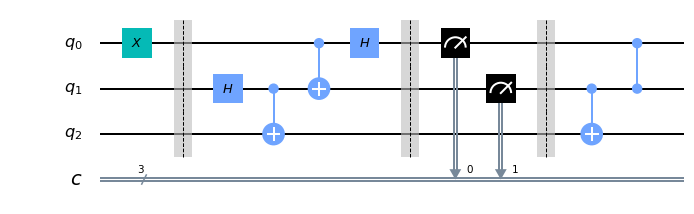

In [54]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,1)
circuit.draw(output='mpl')

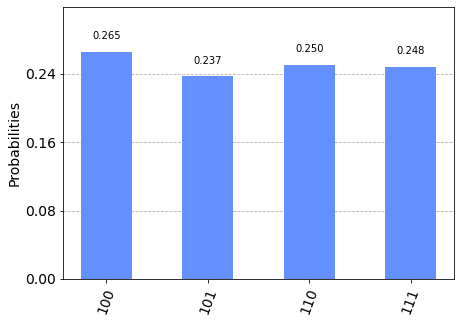

In [55]:
circuit.measure(2,2)
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator,shots=1024).result()
counts=result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [56]:
print(counts)

{'100': 271, '110': 256, '111': 254, '101': 243}


## Bernstein-Varizani Algorithm

In [0]:
%matplotlib inline

In [0]:
secretnumber='1110011100'

In [94]:
circuit=QuantumCircuit(len(secretnumber)+1,len(secretnumber))
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
  if yesno=='1':
    circuit.cx(ii,len(secretnumber))
#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)
circuit.barrier()
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

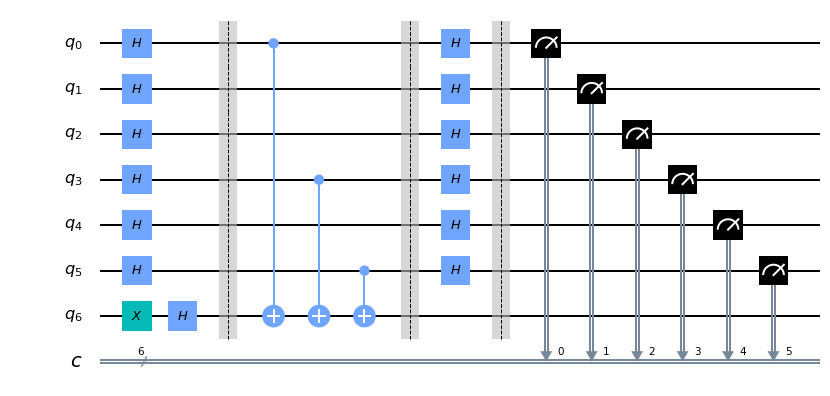

In [85]:
circuit.draw(output='mpl')

In [95]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator,shots=1).result()
counts=result.get_counts()
print(counts)

{'1110011100': 1}
